In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail/Online Retail.xlsx


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#  CUSTOMERS SEGMENTATION IN MARKETING  USING RFM ANALYSIS

# Recency, frequency, monetary (RFM segmentation)
**RFM is a method used to identify and analyze customers based on the Recency of their last purchase, the Frequency of purchases, and the Monetary amount spent**

# important of customer segmentation:
**Identify the best customers and focus on offering them the best treatment
Improve product assortment based on your top customers’ preferences
Create better communication,offers,loyalty programs,experiences,and products for your power customers
Increase customer engagement by leveraging the best-performing channels
Improve and prioritize customer service team’s activity
Create lookalike audiences based on your top customers and improve the results of acquisition campaigns.**

In [3]:
df=pd.read_excel('/kaggle/input/online-retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# making total prices column that present the total prices for every description

In [4]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [6]:
df.drop('StockCode',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   Description  540455 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      541909 non-null  object        
 7   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 33.1+ MB


In [8]:
df.InvoiceNo.value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [9]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.00,541909.00,406829.00,541909.00
mean,9.55,4.61,15287.69,17.99
std,218.08,96.76,1713.60,378.81
min,-80995.00,-11062.06,12346.00,-168469.60
25%,1.00,1.25,13953.00,3.40
50%,3.00,2.08,15152.00,9.75
75%,10.00,4.13,16791.00,17.40
max,80995.00,38970.00,18287.00,168469.60


In [10]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [11]:
df.isna().sum()

InvoiceNo           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [12]:
df1=df.copy()

# # # drop the missing values 

In [13]:
df2=df1.dropna(axis=0)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Description  406829 non-null  object        
 2   Quantity     406829 non-null  int64         
 3   InvoiceDate  406829 non-null  datetime64[ns]
 4   UnitPrice    406829 non-null  float64       
 5   CustomerID   406829 non-null  float64       
 6   Country      406829 non-null  object        
 7   TotalPrice   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 27.9+ MB


# top 10 quantity description

In [15]:
df_quantity_sum=df2.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity',ascending=False)
df_quantity_sum.head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409
POPCORN HOLDER,30504
RABBIT NIGHT LIGHT,27094
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25321


# converting InvoiceNo column to int

In [16]:
df3=df2[~df2['InvoiceNo'].str.contains('C',na=False)]

In [17]:
df3['InvoiceNo']=df3['InvoiceNo'].astype(int)

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   Description  397924 non-null  object        
 2   Quantity     397924 non-null  int64         
 3   InvoiceDate  397924 non-null  datetime64[ns]
 4   UnitPrice    397924 non-null  float64       
 5   CustomerID   397924 non-null  float64       
 6   Country      397924 non-null  object        
 7   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 27.3+ MB


In [19]:
df3.head(3)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


# visualize sum of total prices for customers

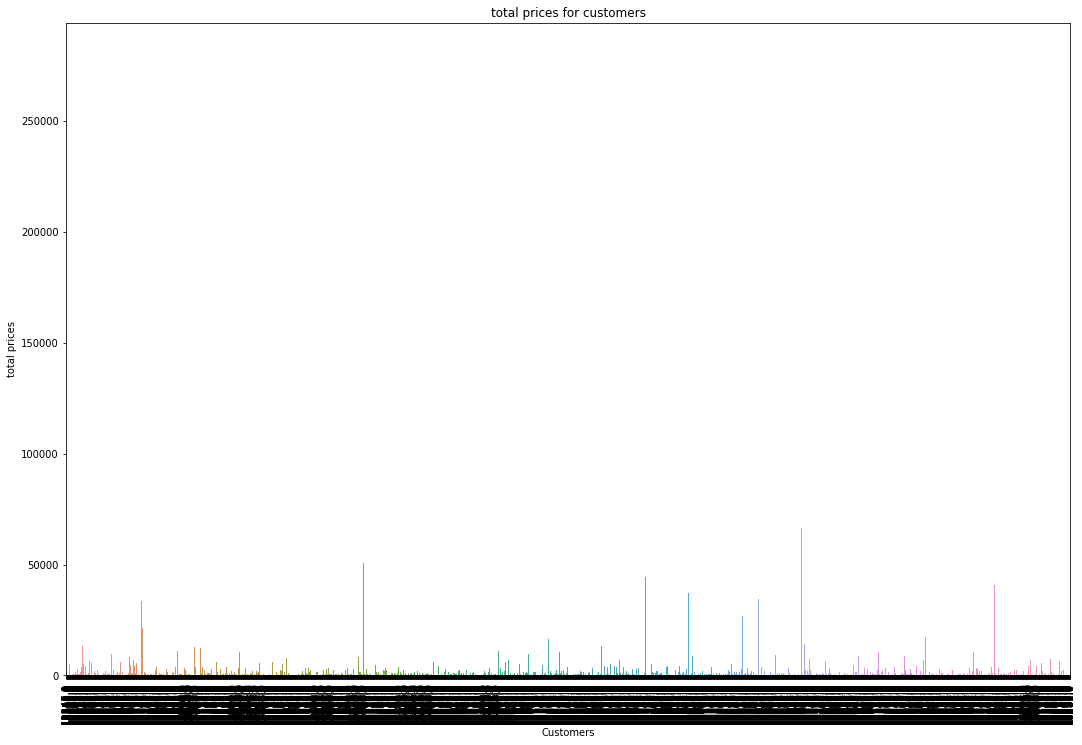

In [20]:
df3_total_customerid=df3.groupby(['CustomerID'])['TotalPrice'].sum().reset_index()
plt.figure(figsize=(18,12))
ax=sns.barplot(data=df3_total_customerid,x='CustomerID',y='TotalPrice')
plt.xlabel('Customers')
plt.ylabel('total prices')
plt.title('total prices for customers')
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# visualize sum of total prices for countries

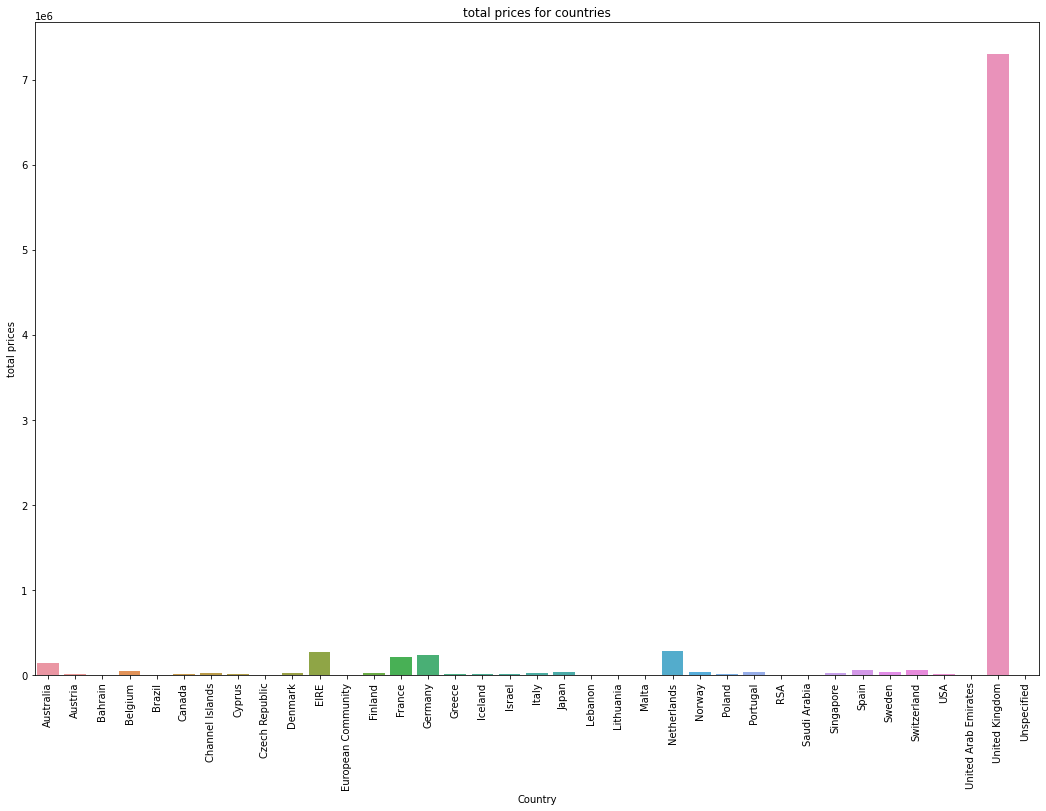

In [21]:
df3_total=df3.groupby(['Country'])['TotalPrice'].sum().reset_index()
plt.figure(figsize=(18,12))
ax=sns.barplot(data=df3_total,x='Country',y='TotalPrice')
plt.xlabel('Country')
plt.ylabel('total prices')
plt.title('total prices for countries')
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# RFM ANALYSIS

# set today's date to counting the recency period from last purchase for every customer

In [22]:
import datetime as dt
df3['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [23]:
today_date=dt.datetime(2011,12,11)

In [24]:
df3.head(1)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [25]:
rfm=df3.groupby('CustomerID').agg({'InvoiceDate':lambda date:(today_date-date.max()).days,'InvoiceNo':lambda num:num.nunique(),'TotalPrice':lambda TotalPrice:TotalPrice.sum()})

# making RFM(Recency&Frequency and monetary)

In [26]:
rfm.columns=['Recency','Frequency','Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [27]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,93.041484,100.007757,1.0,18.000,51.00,142.50,374.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
Monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


# droping Monetary less than or equal zero

In [28]:
rfm=rfm[rfm['Monetary']>0]

In [29]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
Frequency,4338.0,4.272706,7.706221,1.00,1.000,2.000,5.00,210.00
Monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02


# set values from 1_5 for every customer in Recency&Frequency and Monetary

# the closer date has 5 and the farest date has 1

In [30]:
rfm['recency_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

# the higher frequency has 5 and the lowest frequency has 1

In [31]:
rfm['frequency_score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])


# the highest money entery has 5 and the lowest money entery has 1

In [32]:
rfm['monetary_score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

In [33]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,3,7,4310.00,5,5,5
12348.0,76,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2


# we making RFM ANALYSIS to Identify the best customers and focus on offering them the best treatment and Improving and prioritize customer service team’s activity and campaigns so we droping the monetary effecting.

# we put Recency as 100 and Frequency as 10 

In [34]:
rfm['RFM_SCORE']=(rfm['recency_score'].astype(str)+rfm['frequency_score'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,11
12347.0,3,7,4310.00,5,5,5,55
12348.0,76,4,1797.24,2,4,4,24
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11


# making segment map for customers to cluster them

In [35]:
seg_map={r'[1-2][1-2]':'hibernating',r'[1-2][3-4]':'at_risk',r'[1-2]5':'cant_lose',r'3[1-2]':'about_to_sleep',r'33':'need_attention',r'[3-4][4-5]':'loyal_customers',r'41':'promissing',r'51':'new_customers',r'[4-5][2-3]':'potential_loyalists',r'5[4-5]':'champions'}
rfm['segment']=rfm['RFM_SCORE'].replace(seg_map,regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,hibernating
12347.0,3,7,4310.00,5,5,5,55,champions
12348.0,76,4,1797.24,2,4,4,24,at_risk
12349.0,19,1,1757.55,4,1,4,41,promissing
12350.0,311,1,334.40,1,1,2,11,hibernating


# segment description

In [36]:
rfm[['segment','Recency','Frequency','Monetary']].groupby('segment').agg(['mean','count','max']).round(2)

Recency            Frequency            Monetary        \
                       mean count  max      mean count  max     mean count   
segment                                                                      
about_to_sleep        53.31   352   72      1.16   352    2   471.99   352   
at_risk              153.79   593  374      2.88   593    6  1084.54   593   
cant_lose            132.97    63  373      8.38    63   34  2796.16    63   
champions              6.36   633   13     12.42   633  210  6857.94   633   
hibernating          217.61  1071  374      1.10  1071    2   488.64  1071   
loyal_customers       33.61   819   72      6.48   819   63  2864.25   819   
need_attention        52.43   187   72      2.33   187    3   897.63   187   
new_customers          7.43    42   13      1.00    42    1   388.21    42   
potential_loyalists   17.40   484   33      2.01   484    3  1041.22   484   
promissing            23.51    94   33      1.00    94    1   294.01    94   

                                
                           max  
segment                         
about_to_sleep         6207.67  
at_risk               44534.30  
cant_lose             10254.18  
champions            280206.02  
hibernating           77183.60  
loyal_customers      124914.53  
need_attention        12601.83  
new_customers          3861.00  
potential_loyalists  168472.50  
promissing             1757.55

# THE FINALS RESULTS

# # we see that the most effective customers is (champions&loyal customers) and there is some customers in ther way to be loyal customers so we need to care about them and some customers need more attention.
# # there is customers(hibernating and about to sleep) don't waste your effort and money on them.